In [1]:
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
keras.datasets.cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [3]:
((x_train, y_train), (x_test, y_test)) = keras.datasets.cifar10.load_data()

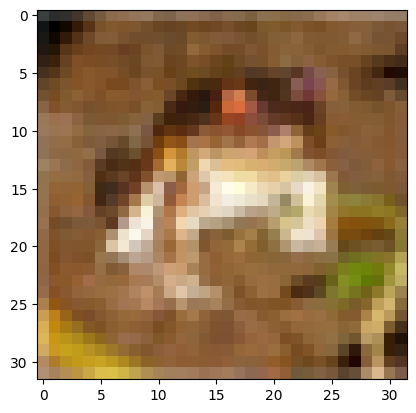

In [5]:
def draw_image(idx):
    plt.imshow(x_train[idx], cmap = plt.cm.binary)
    plt.show()
draw_image(0)


In [6]:
type(x_train)

numpy.ndarray

In [7]:
# Normalize data
X_train = keras.utils.normalize(x_train, axis = 1)
X_test = keras.utils.normalize(x_test, axis = 1)

Y_train = keras.utils.to_categorical(y_train, 10)
Y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
X_train.shape, Y_train.shape

((50000, 32, 32, 3), (50000, 10))

### Model

In [36]:
image_width = 32
image_height = 32
model = keras.Sequential()
#Add input layer
model.add(keras.layers.Input(shape = (image_height, image_width, 3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = keras.layers.ReLU()))
model.add(keras.layers.Dense(64, activation = keras.layers.ReLU()))


model.add(keras.layers.Dense(10, activation = 'softmax'))

In [37]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 3072)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               393344    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [38]:
# What loss to use? What optimizer to use? What metrics to use?
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.AdamW(
    learning_rate=0.008), metrics=['accuracy'])

In [39]:
history = model.fit(X_train, Y_train, epochs=20,
                    batch_size=128, validation_data=(X_test, Y_test))

Epoch 1/20
391/391 [==============================] - 2s 3ms/step - loss: 2.1417 - accuracy: 0.2231 - val_loss: 1.9837 - val_accuracy: 0.2860
Epoch 2/20
391/391 [==============================] - 1s 3ms/step - loss: 1.9628 - accuracy: 0.2864 - val_loss: 1.9769 - val_accuracy: 0.2871
Epoch 3/20
391/391 [==============================] - 1s 3ms/step - loss: 1.9049 - accuracy: 0.3090 - val_loss: 2.0271 - val_accuracy: 0.2899
Epoch 4/20
391/391 [==============================] - 1s 3ms/step - loss: 1.8652 - accuracy: 0.3246 - val_loss: 1.8303 - val_accuracy: 0.3413
Epoch 5/20
391/391 [==============================] - 1s 3ms/step - loss: 1.8287 - accuracy: 0.3394 - val_loss: 1.8181 - val_accuracy: 0.3510
Epoch 6/20
391/391 [==============================] - 1s 3ms/step - loss: 1.8157 - accuracy: 0.3447 - val_loss: 1.7966 - val_accuracy: 0.3595
Epoch 7/20
391/391 [==============================] - 1s 3ms/step - loss: 1.8009 - accuracy: 0.3555 - val_loss: 1.8018 - val_accuracy: 0.3501
Epoch 

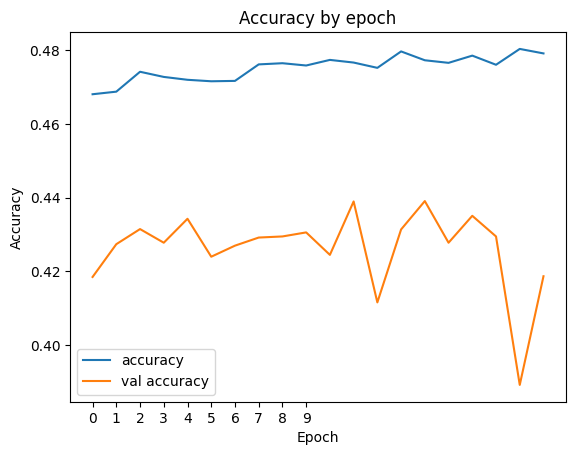

In [25]:
plt.title("Accuracy by epoch")
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(0,10))
plt.legend()

### Inference

In [ ]:
test_image = X_test[12]
plt.imshow(test_image, cmap = plt.cm.binary)

NameError: name 'X_test' is not defined